<a href="https://colab.research.google.com/github/penny1xu/Machine-Learning-feature-predict/blob/main/Linear_Regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First, import the pandas pacakge and read the csv file:

In [50]:
import pandas as pd
ad = pd.read_csv("Advertising.csv",index_col = 0)
ad.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


You could use describe() to get a summary of every column of the pandas data frame


In [51]:
ad.describ

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Plot sales against TV


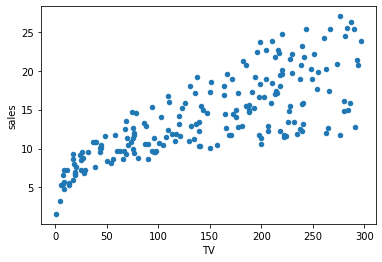

In [52]:
ad.plot.scatter(x = 'TV', y = 'sales')

Correlation betwen sales and TV



In [53]:
ad[['TV','sales']].corr()


,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


FIt linear regression of sales on TV using package sklearn



In [59]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = ad.TV.to_numpy().reshape([-1,1])
y = ad.sales.to_numpy()
fit1 = LinearRegression().fit(X, y)

Look at the slope and the intercept


In [61]:
print(fit1.coef_)
print(fit1.intercept_)

[0.04753664]
7.032593549127695


You can also use the package statsmodel to get a table summary of the linear model


In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#fit linear regression model
model1 = ols('sales ~ TV',data=ad).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        00:07:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

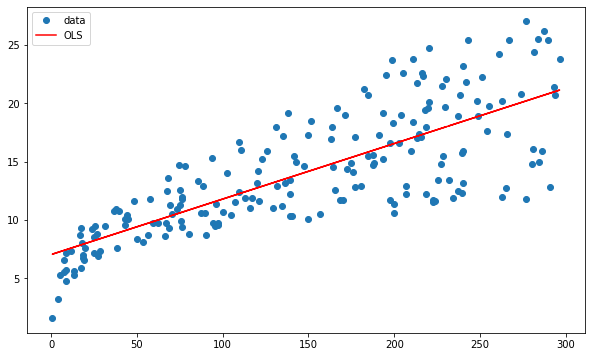

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6)) # change plot size
ax.plot(X, y, "o", label="data")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plt.show()